In [12]:
import functions
exec(open('./functions.py').read())
import demoji
#demoji.download_codes()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
#load labelled data (generated in file 2.preprocessing_en)
data = pickle.load(open('data_n_models/4.eng_df_bot_classified.pkl', "rb"))

#filter out bot reated data
data = data[data['bot']==False]

#additional cleaning
data['lemma']=[strip_multiple_whitespaces(c) for c in data['lemma']]
data['lemma']=clean_complete(data.lemma)

#dropping duplicates based only on lemmatized text
data = data.drop_duplicates(subset=['lemma'])
data.head()

C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:57: FutureWarning: The default value of regex will change from True to False in a future version.
C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:64: FutureWarning: The default value of regex will change from True to False in a future version.
C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: The default value of regex will change from True to False in a future version.
C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:66: FutureWarning: The default value of regex will change from True to False in a future version.
C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:76: FutureWarning: The default value of regex will change from True to False in a future version.
C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:82: FutureWarning: The default value of regex will change from True to False in a future version.


,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lemma,bot
0,0,819101311715131392,77,Ali09685762,@Zalando give me my money you owe me!!!,0,,07-Mar-2021,6,False,0.0,NaN,zalando,en,money owe,give money you owe me!!!,0.0000,money owe,False
1,1,1189512849472643072,105,Labellerr1,#VirtualStyling and try-on increases the conve...,0,chandigarh,06-Mar-2021,18,False,0.0,NaN,zalando,en,virtualstyling try increases conversion rate l...,VirtualStyling and try-on increases the conver...,0.7650,virtualstyle try increase conversion rate larg...,False
3,3,1125728513666048000,9604,DommeLineCoUk,@missbellalugosi @Zalando Problem starts at Ad...,0,,06-Mar-2021,2193,False,1.0,1.368196e+18,zalando,en,problem starts adidas selling latex websites,Problem starts Adidas. They're selling latex t...,-0.4019,problem start adida sell latex website,False
4,4,2614256724,35470,medboyUK,@missbellalugosi @Zalando Welcome to my world ...,0,"West Midlands, UK",06-Mar-2021,2503,False,1.0,1.368196e+18,zalando,en,welcome world sneering disdain,Welcome world sneering and disdain!,-0.1007,welcome world sneer disdain,False
5,5,978410484155199488,1549,missbellalugosi,Hey @Zalando these clothes are not made of la...,0,GERMANY / UK / USA,06-Mar-2021,13827,False,17.0,NaN,zalando,en,hey clothes latex plastic latex rubber stitche...,"Hey these clothes are not made latex, they are...",0.5362,hey clothe latex plastic latex rubber stitch r...,False


In [41]:
for i, value in data[10:20].lemma.iteritems():
    print(i, value)

11 recieve wrong item do n’t know item cheap item want
12 send delivery paper bag
13 order eventually thing happen expectation feed information whomever concerned zalando
14 hey order product web shop item " fast delivery " suppose arrive today unfortunately ship parcel time happen sad
15 zalando think big pregnant suggest lovely maternity clothe ️ ️ ️ ️ ️ ️ ️ thank love ️ ️ ️ ️
16 think belong sport shoe section
17 new redezign circularity pilot product product pilot equip digital tag save product datum scan able discover product history digital product site ️ ️
18 zalando ride cargo bike delivery service netherland
19 order ship able provide status update
20 check new cto cto podcast format dedicate impactful tech in episode victoria schmierer share story implement pre own give new life clothe ecommerce sustainability reuse rewear


# clustering with LatentDirichletAllocation

https://ourcodingclub.github.io/tutorials/topic-modelling-python/

# on the whole dataset

In [59]:
# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=30, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(data['lemma']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [49]:
 # Each row is a tweet and each column is a word. The numbers in each position tell us how many times this word appears in this tweet.
 tf

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
print(tf_feature_names)

['able', 'absolute', 'absolutely', 'abt', 'abuse', 'acc', 'accept', 'access', 'accessory', 'accident', 'accidentally', 'accord', 'account', 'act', 'action', 'active', 'actual', 'actually', 'add', 'addict', 'addiction', 'address', 'adida', 'admin', 'admire', 'admit', 'adorable', 'adult', 'advert', 'advertise', 'advertising', 'advice', 'advise', 'adwd', 'affect', 'afford', 'affordable', 'afraid', 'afternoon', 'age', 'agent', 'ago', 'agree', 'ahead', 'ahh', 'ahhh', 'aid', 'ain', 'air', 'airport', 'album', 'aliexpress', 'allow', 'alright', 'alternative', 'amazing', 'amazon', 'america', 'american', 'angel', 'angry', 'animal', 'ankle', 'announce', 'annoy', 'annoyed', 'annoying', 'answer', 'anthropologie', 'anti', 'anybody', 'anymore', 'anyways', 'apart', 'apology', 'app', 'apparently', 'appear', 'apple', 'application', 'apply', 'appreciate', 'approach', 'april', 'area', 'aren', 'argo', 'argue', 'argument', 'arm', 'arrive', 'art', 'article', 'artist', 'asap', 'asc', 'asian', 'ask', 'asos', 'a

In [66]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 9

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [67]:
model.fit(tf)

LatentDirichletAllocation(n_components=9, random_state=0)

In [150]:
#	Calculate approximate log-likelihood as score.
model.score(tf)

-16408.006729321656

a function which takes in our model object model, the order of the words in our matrix tf_feature_names and the number of words we would like to show. Use this function, which returns a dataframe, to show you the topics we created. Remember that each topic is a list of words/tokens and weights

In [68]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [73]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights
0,order,5308.0,boohoo,1363.9,asos,6091.7,year,1263.7,asos,3221.1,win,1177.6,asosiwd,1243.1,boohoo,9861.4,’t,4483.0
1,day,2073.7,zalando,1290.0,buy,1300.7,myasosluck,1062.6,check,2185.9,boohootreat,1003.0,asos,1079.6,people,1403.8,n,4479.6
2,delivery,1798.1,girl,1276.1,size,1192.9,asos,770.9,fashion,2041.4,asos,994.8,buy,624.5,like,1125.6,like,2853.7
3,return,1746.1,boohooluckydip,637.0,code,843.0,come,684.6,good,1944.4,need,700.1,woman,578.6,man,688.2,asos,2674.9
4,help,1443.7,let,603.7,jean,798.0,old,585.6,love,1930.2,new,683.4,friend,502.2,fuck,669.8,boohoo,1353.3
5,send,1442.8,city,582.5,discount,663.6,week,564.3,poshmark,1467.1,love,672.9,good,492.7,shit,662.3,look,1142.4
6,’t,1395.1,happy,403.1,thank,593.1,month,542.5,shopmycloset,1456.1,spend,576.5,model,469.6,want,595.1,clothe,1087.6
7,n,1392.5,omg,390.9,shoe,574.8,day,534.2,item,1428.7,birthday,572.5,wear,468.1,bad,533.6,shop,700.7
8,asos,1307.3,collection,355.1,fit,572.7,work,524.0,share,1305.1,yes,548.5,work,410.1,fucking,502.4,feel,683.9
9,refund,1184.1,luck,305.5,pair,565.1,time,501.4,style,1304.1,nationalpetday,463.1,man,406.9,bitch,411.0,know,576.4


# Zalando only

In [80]:
data_zal = data[data['keyword']=='zalando']

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=30, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(data_zal['lemma']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

number_of_topics = 9

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
model.fit(tf)

no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights
0,zalando,97.0,zalando,167.1,zalando,129.2,zalando,519.3,want,70.1,zalando,138.1,zalando,128.3,zalando,102.8,zalando,94.5
1,good,87.1,order,109.1,thank,85.1,like,110.1,zalando,63.8,fashion,101.7,look,69.7,time,67.1,new,86.1
2,work,59.1,account,105.8,day,62.1,cop,24.8,’t,44.1,need,70.1,retail,46.1,today,57.1,customer,50.1
3,return,56.1,buy,91.0,nike,40.1,help,18.9,n,44.1,online,67.7,growth,40.1,join,48.2,love,48.4
4,brand,47.8,drop,38.1,sell,39.1,account,9.9,stock,41.1,market,48.8,size,37.1,company,45.9,product,40.1
5,think,31.0,week,29.9,success,33.1,look,0.3,european,16.2,check,48.1,shoe,34.1,team,37.9,clothe,38.1
6,item,26.1,try,28.2,account,16.7,try,0.3,buy,7.2,europe,36.1,pair,32.0,know,37.0,big,35.9
7,team,13.4,come,27.1,cop,9.4,company,0.1,item,5.7,platform,30.1,run,31.1,delivery,33.0,people,31.7
8,help,11.7,send,14.5,people,8.5,pair,0.1,know,3.2,european,21.0,great,31.1,come,6.1,send,24.7
9,try,11.4,help,5.8,pair,8.2,need,0.1,look,0.2,look,17.4,think,9.3,big,5.6,help,8.0


# Zalando positive

In [81]:
data_zal_pos = data[data['compound'] > 0.5]

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=30, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(data_zal['lemma']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

number_of_topics = 9

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
model.fit(tf)

no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights
0,zalando,97.0,zalando,167.1,zalando,129.2,zalando,519.3,want,70.1,zalando,138.1,zalando,128.3,zalando,102.8,zalando,94.5
1,good,87.1,order,109.1,thank,85.1,like,110.1,zalando,63.8,fashion,101.7,look,69.7,time,67.1,new,86.1
2,work,59.1,account,105.8,day,62.1,cop,24.8,’t,44.1,need,70.1,retail,46.1,today,57.1,customer,50.1
3,return,56.1,buy,91.0,nike,40.1,help,18.9,n,44.1,online,67.7,growth,40.1,join,48.2,love,48.4
4,brand,47.8,drop,38.1,sell,39.1,account,9.9,stock,41.1,market,48.8,size,37.1,company,45.9,product,40.1
5,think,31.0,week,29.9,success,33.1,look,0.3,european,16.2,check,48.1,shoe,34.1,team,37.9,clothe,38.1
6,item,26.1,try,28.2,account,16.7,try,0.3,buy,7.2,europe,36.1,pair,32.0,know,37.0,big,35.9
7,team,13.4,come,27.1,cop,9.4,company,0.1,item,5.7,platform,30.1,run,31.1,delivery,33.0,people,31.7
8,help,11.7,send,14.5,people,8.5,pair,0.1,know,3.2,european,21.0,great,31.1,come,6.1,send,24.7
9,try,11.4,help,5.8,pair,8.2,need,0.1,look,0.2,look,17.4,think,9.3,big,5.6,help,8.0


# keyword approach

In [88]:
def define_team(df):
    pattern_payment = r"(voucher|pay|money|klarna|refund|PayPal|bank|£|loan|bill|charg|rate|cost|expens|invoice|budget|usd|euro|Promo|discount)"
    pattern_logistics= r"(\sship|parcel|cargo|delivery|return|logistic|warehouse|stock|packag)"
    pattern_weather = r"(Iembot|Iem)"
    pattern_fit = r"(size|fit|waist|small|large|medium|dimensions|extent|measurement|mass|length|volume|proportions|bulk|width|big|huge|adapt|shape|arrange|alter|tailor|adjust|modify|tweak|customize)"
    pattern_search = r"(search|find|inquiry|investigat|examin|pursuit|quest|inspect|explor|check)"


    pattern_catalog = r"(catalog|list)"
    pattern_sustain = r"(tree|green|environment|sustain|natur|climate)"
    pattern_recommendation = r"(recommend|refer|advice|propos|suggest|counsel|guid)"
    pattern_outfit = r"(outfit|costume|dress|cloth|suit|gear|jacket|jean|shirt|style|brand)"
    pattern_tech = r"(devops|technology|automation|application|\sAI\s|kubernetes|restapis|microservice|iOS|Android|app\s|Backend|\sUI\s)"
    pattern_support=r"(help|support|service|email|phone|reach|contact)"
    pattern_account=r"(account|acc\s)"
    pattern_stock=r"(stock|ebit|GMV|earn|forecast|tick|report|annual|loss|GBP|CAC|DAX|FTSE)"

    df['team'] = 'Other'
    for i, row in df.iterrows():
        
        match_logistics = re.findall(pattern_logistics, row.lemma, re.IGNORECASE) 
        if len(match_logistics) > 0:
            df['team'].loc[i] = 'Logistics'

        match_payment = re.findall(pattern_payment, row.lemma, re.IGNORECASE) 
        if len(match_payment) > 0:
            df['team'].loc[i] = 'Payment'

        match_weather = re.findall(pattern_weather, row['name'], re.IGNORECASE) 
        if len(match_weather) > 0:
            df['team'].loc[i] = 'Weather'

        match_fit = re.findall(pattern_fit, row.lemma, re.IGNORECASE) 
        if len(match_fit) > 0:
            df['team'].loc[i] = 'Fit'

        match_search = re.findall(pattern_search, row.lemma, re.IGNORECASE) 
        if len(match_search) > 0:
            df['team'].loc[i] = 'Search'

        match_catalog = re.findall(pattern_catalog, row.lemma, re.IGNORECASE) 
        if len(match_catalog) > 0:
            df['team'].loc[i] = 'Catalog'

        match_sustain = re.findall(pattern_sustain, row.lemma, re.IGNORECASE) 
        if len(match_sustain) > 0:
            df['team'].loc[i] = 'Sustainability'
        
        match_recommend = re.findall(pattern_recommendation, row.lemma, re.IGNORECASE) 
        if len(match_recommend) > 0:
            df['team'].loc[i] = 'Recommendation'

        match_outfit = re.findall(pattern_outfit, row.lemma, re.IGNORECASE) 
        if len(match_outfit) > 0:
            df['team'].loc[i] = 'Outfit'

        match_tech = re.findall(pattern_tech, row.lemma, re.IGNORECASE) 
        if len(match_tech) > 0:
            df['team'].loc[i] = 'Tech'
        
        match_support = re.findall(pattern_support, row.lemma, re.IGNORECASE) 
        if len(match_support) > 0:
            df['team'].loc[i] = 'Support'

        match_account = re.findall(pattern_account, row.lemma, re.IGNORECASE) 
        if len(match_account) > 0:
            df['team'].loc[i] = 'Account'
        
        match_tech = re.findall(pattern_tech, row.lemma, re.IGNORECASE) 
        if len(match_tech) > 0:
            df['team'].loc[i] = 'Tech'

        match_stock = re.findall(pattern_stock, row.lemma, re.IGNORECASE) 
        if len(match_stock) > 0:
            df['team'].loc[i] = 'Stock'
    return df

In [87]:
teams = define_team(data)

C:\Anaconda\envs\uni\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [24]:
teams.loc[60918].tweet

'@SarahJayBee Zalando has some “regular” brands on it that aren’t dear and you have a massive mix of brands, the baby selection is all I’ve looked at and is pretty good but there looks to be a massive range of kids stuff. Nothing like feeling the softness and washability in real life though!'

In [95]:
#testing results by checking random 10 tweets
sample = teams[(teams.team == 'Stock')&(teams.keyword == 'zalando')].sample(n=10)
for i, row in sample.iterrows():
    print(str(i) + ' ' + sample.name[i] + ' ' + sample.tweet[i])

24400 SiteFocusHQ $ZLDSF Earnings Intelligence Analysis of recent earnings identified Zalando SE ( OTC:ZLDSF ) business focus on (growth,investments,opportunities,technology), (growth,investments,technology), (growth,opportunities,technology)

https://t.co/iXNtHlcUsd
67393 habetsF1 Me, a person who’s bedroom looks like a Zalando stockroom: i have nothing to wear and i will stress about it until i will wear the same oversized tshirt and a pair of docs as always
60917 SuperCutePuppyX @wiky_13 @Excelerate___ Take a step back, and observe the sites, take notes which ones get big stock, which ones are similar. People waste 2 much time on small websites
Ftl
Mesh
Courir
Awlab
Zalando
Focus on the big 5, 1 by 1. I’d say courir is the biggest shit so take that for last
93295 GalaxyClicks ZALANDO RESTOCK TODAY. JOIN NOW: https://t.co/ai473gJIGw
34650 quiatimet Anyone have any experience with zalando? They have a bag that I want. Irish shops had it last year but not in stock now. Won’t buy it fro

<AxesSubplot:xlabel='keyword', ylabel='count'>

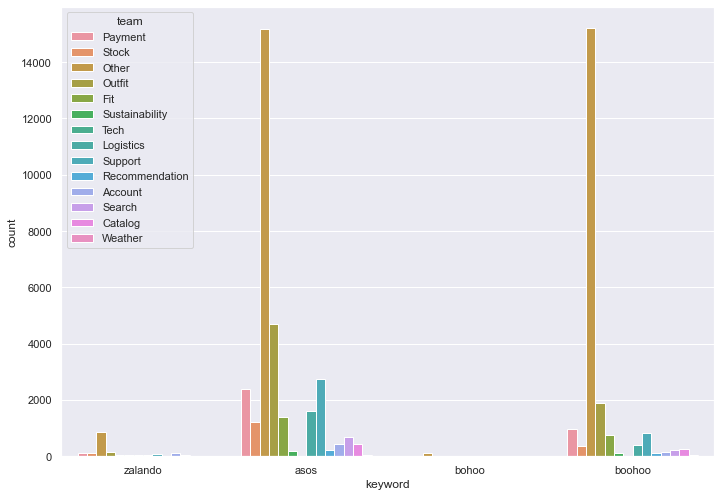

In [91]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data=teams, x='keyword',hue='team')


<AxesSubplot:xlabel='team', ylabel='count'>

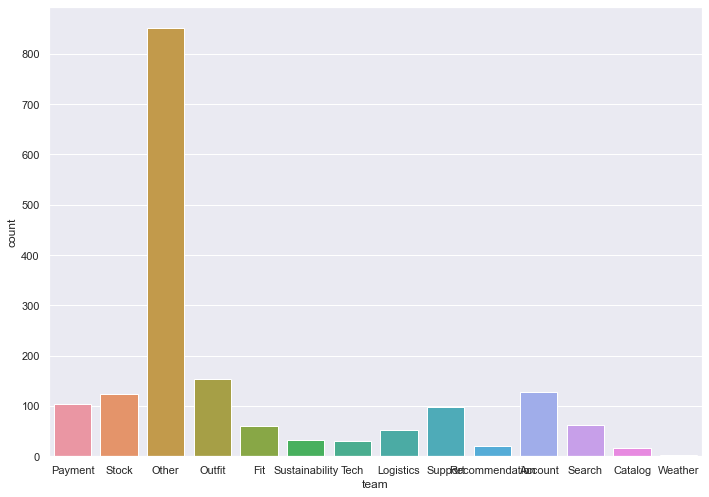

In [94]:
sns.countplot(data=teams[teams['keyword']=='zalando'], x='team')

In [116]:
teams['sentiment'] = teams['compound']
teams['sentiment'] = np.where(teams['sentiment']>=0.5, 1, teams['sentiment'])
teams['sentiment'] = np.where(teams['sentiment']<=-0.5, -1, teams['sentiment'])
teams['sentiment'] = np.where((teams['sentiment']>-0.5)&(teams['sentiment']<0.5), 0, teams['sentiment'])

In [117]:
teams.head()

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,...,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lemma,bot,team,sentiment
0,0,819101311715131392,77,Ali09685762,@Zalando give me my money you owe me!!!,0,,07-Mar-2021,6,False,...,NaN,zalando,en,money owe,give money you owe me!!!,0.0000,money owe,False,Payment,0.0
1,1,1189512849472643072,105,Labellerr1,#VirtualStyling and try-on increases the conve...,0,chandigarh,06-Mar-2021,18,False,...,NaN,zalando,en,virtualstyling try increases conversion rate l...,VirtualStyling and try-on increases the conver...,0.7650,virtualstyle try increase conversion rate larg...,False,Stock,1.0
3,3,1125728513666048000,9604,DommeLineCoUk,@missbellalugosi @Zalando Problem starts at Ad...,0,,06-Mar-2021,2193,False,...,1.368196e+18,zalando,en,problem starts adidas selling latex websites,Problem starts Adidas. They're selling latex t...,-0.4019,problem start adida sell latex website,False,Other,0.0
4,4,2614256724,35470,medboyUK,@missbellalugosi @Zalando Welcome to my world ...,0,"West Midlands, UK",06-Mar-2021,2503,False,...,1.368196e+18,zalando,en,welcome world sneering disdain,Welcome world sneering and disdain!,-0.1007,welcome world sneer disdain,False,Other,0.0
5,5,978410484155199488,1549,missbellalugosi,Hey @Zalando these clothes are not made of la...,0,GERMANY / UK / USA,06-Mar-2021,13827,False,...,NaN,zalando,en,hey clothes latex plastic latex rubber stitche...,"Hey these clothes are not made latex, they are...",0.5362,hey clothe latex plastic latex rubber stitch r...,False,Outfit,1.0


In [121]:
pickle.dump(teams, open(r'.\data_n_models\5.eng_df_teams_classified.pkl', 'wb'))

<AxesSubplot:xlabel='team', ylabel='count'>

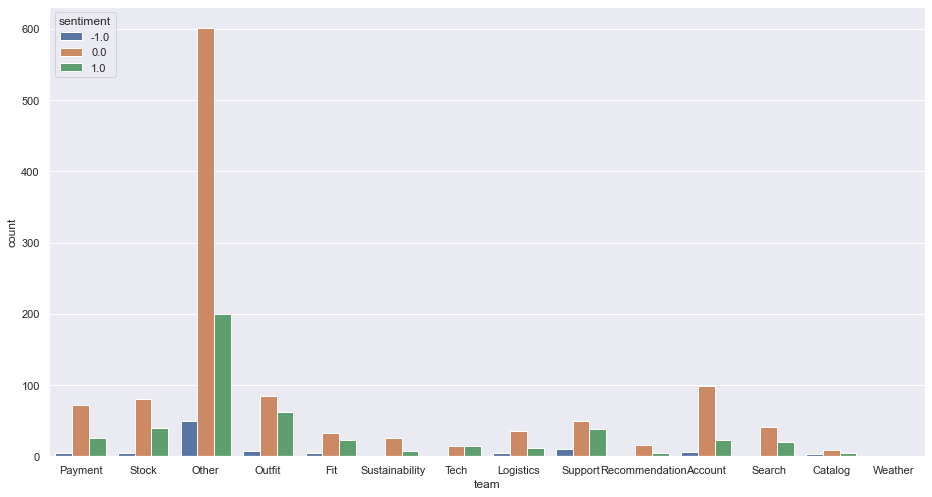

In [119]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.countplot(data=teams[teams['keyword']=='zalando'], x='team',hue='sentiment')

<AxesSubplot:xlabel='team', ylabel='count'>

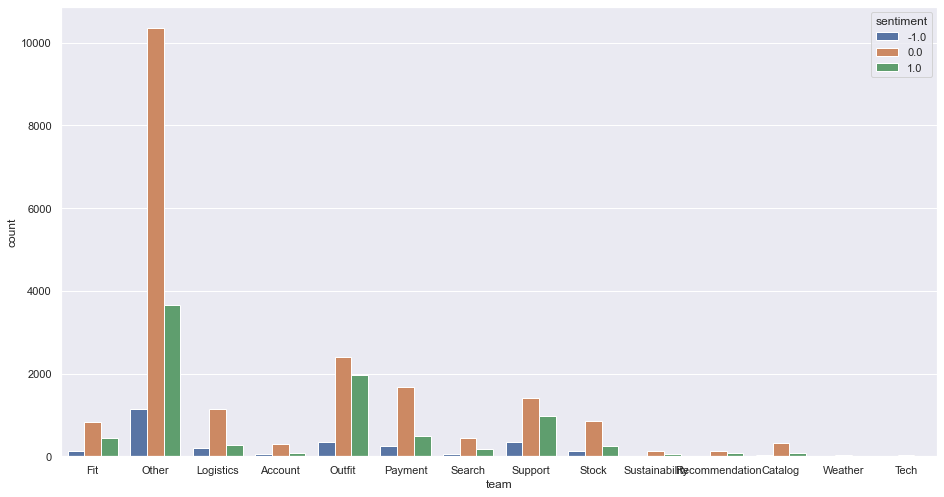

In [120]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.countplot(data=teams[teams['keyword']=='asos'], x='team',hue='sentiment')

In [127]:
#top 10 negative tweets about Zalando
for i, tweet in teams[teams['keyword']=='zalando'].sort_values(by='compound')[:10].iterrows():
    print(tweet.tweet)

Fuck @Zalando @Zalando_Press ! What a negative company history and now this annoying tv commercials ! Who the hell needs that ???
@d0h0k1 @anchor_protocol WTF bro. This blockchain shit doesn't work. After this, I'm quitting my crypto job and applying to Zalando and Deliveroo. Fuck crypto!
I bought two more pairs of shoes this morning, from Zalando Lounge, for summer. Only with the new Covid numbers and slow vaccination we'll probably all sit at home. And cry. I hate the stupid selfishness of people.
@Zalando Have already done so. I am really very dismayed with this terrible process; I have to *prove* that I returned the items, even though Zalando have rec'd parcel &amp; are the ones that have made the mistake. V disappointed; would not shop again at Zalando.
@Zalando get your shit together wtf was that i wasn‘t even able to click on the jordans and they were already sold out what the actual fuck
@Zalando you guys messed up my order almost a month ago and forced the package to be sent b

In [136]:
#functions
def print_tweets(data, keyword, topic, number=10, positive=True):
    for i, tweet in data[(data['keyword']==keyword)&(data['team']==topic)].sort_values(by='compound', ascending= not positive)[:number].iterrows():
        print(tweet.tweet)



In [138]:
print_tweets(teams, 'zalando', 'Support')

Already a year! 🗓 An exciting year full of satisfactions, challenges and mutual support. Proud to be part to this great family ! 🥳🎉🎂@Zalando @ZalandoTech https://t.co/7nKZFTJvGD
💥Hey ... listen up! We still need a super star to help my team. We can provide wonderful challenges seen from an architecture perspective. Clean code. TDD. Autonomy.

In an organization that is becoming truly engineering led. Inspired by Facebook, Spotify, Zalando etc
Zalando hit a 25% growth spurt in 2020 and outgrew its ERP system! To better serve its 35 million customers, the company digitally transformed its innovative fashion platform with SAP #S4HANA to support ambitious growth. https://t.co/NELc9ovOJl https://t.co/NZ8UEHrvpT
Huge thanks to @Zalando &amp; @voluntireland for the fantastic career workshop with our clients yesterday! The team from Zalando offered advice, inspiration and practical CV and interview tips to help our clients on their job hunt. https://t.co/lmYDZRmpWK
A lot of mistakes later it’s

Word Cloud Saved Successfully


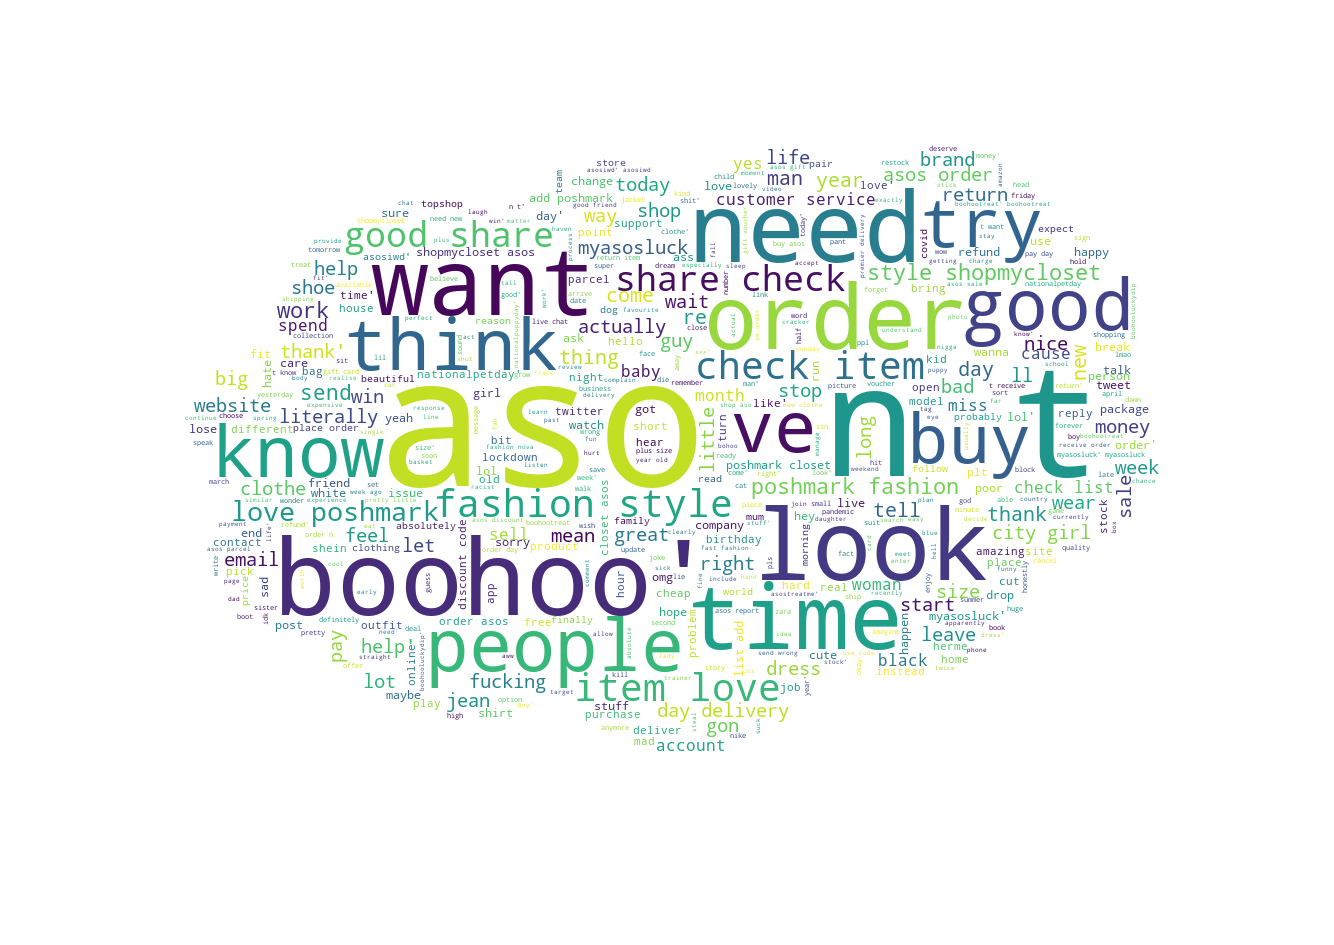

In [157]:
# Function to create a wordcloud
def create_wordcloud(tweet, path='data_n_models\wc_pos.png'):
    """ this function takes in two arguments, the path to save the file and the tweet"""
    mask = np.array(Image.open("data_n_models\cloud.png"))
    stopwords = set(STOPWORDS)
    stopwords.update(["boohoo","boohoo'" "asos","asos'",'Zalando','zalando','fuck',"fuck'", "zalando'",'bitch','shit'])
    wc = WordCloud(background_color='white', mask = mask, max_words=500, stopwords=stopwords, repeat=False)
    tweet = [tweet.strip("'") for tweet in tweet]
    wc.generate(str(tweet))
    wc.to_file(path)
    print('Word Cloud Saved Successfully')
    display(Image.open(path))
#Creating wordcloud for all tweets
create_wordcloud(teams['lemma'].values)

Word Cloud Saved Successfully


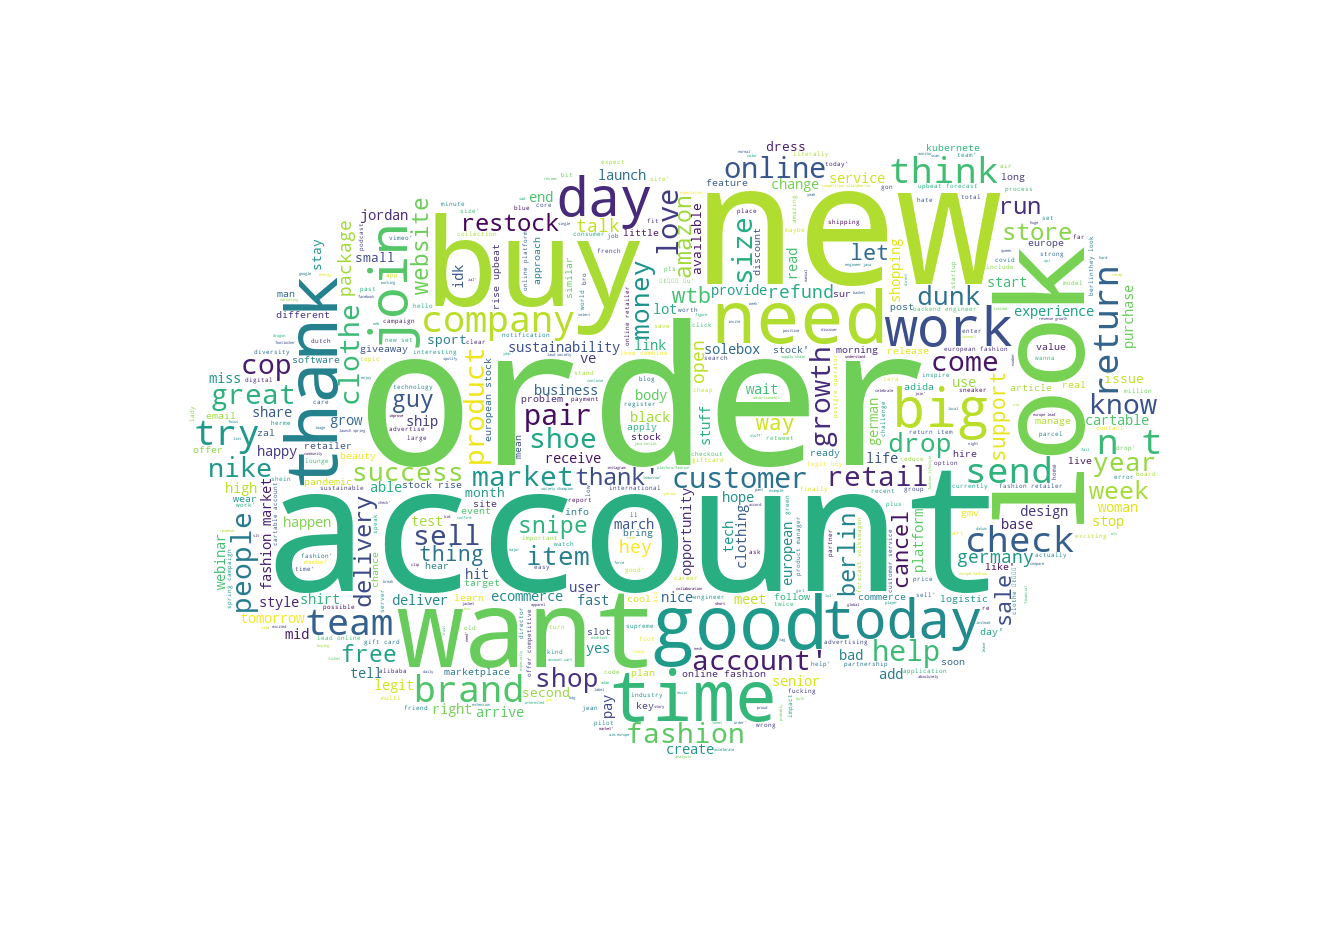

In [158]:
#Creating wordcloud for all Zalando
zalando = teams[teams['keyword']=='zalando']
create_wordcloud(zalando.lemma.values)

Word Cloud Saved Successfully


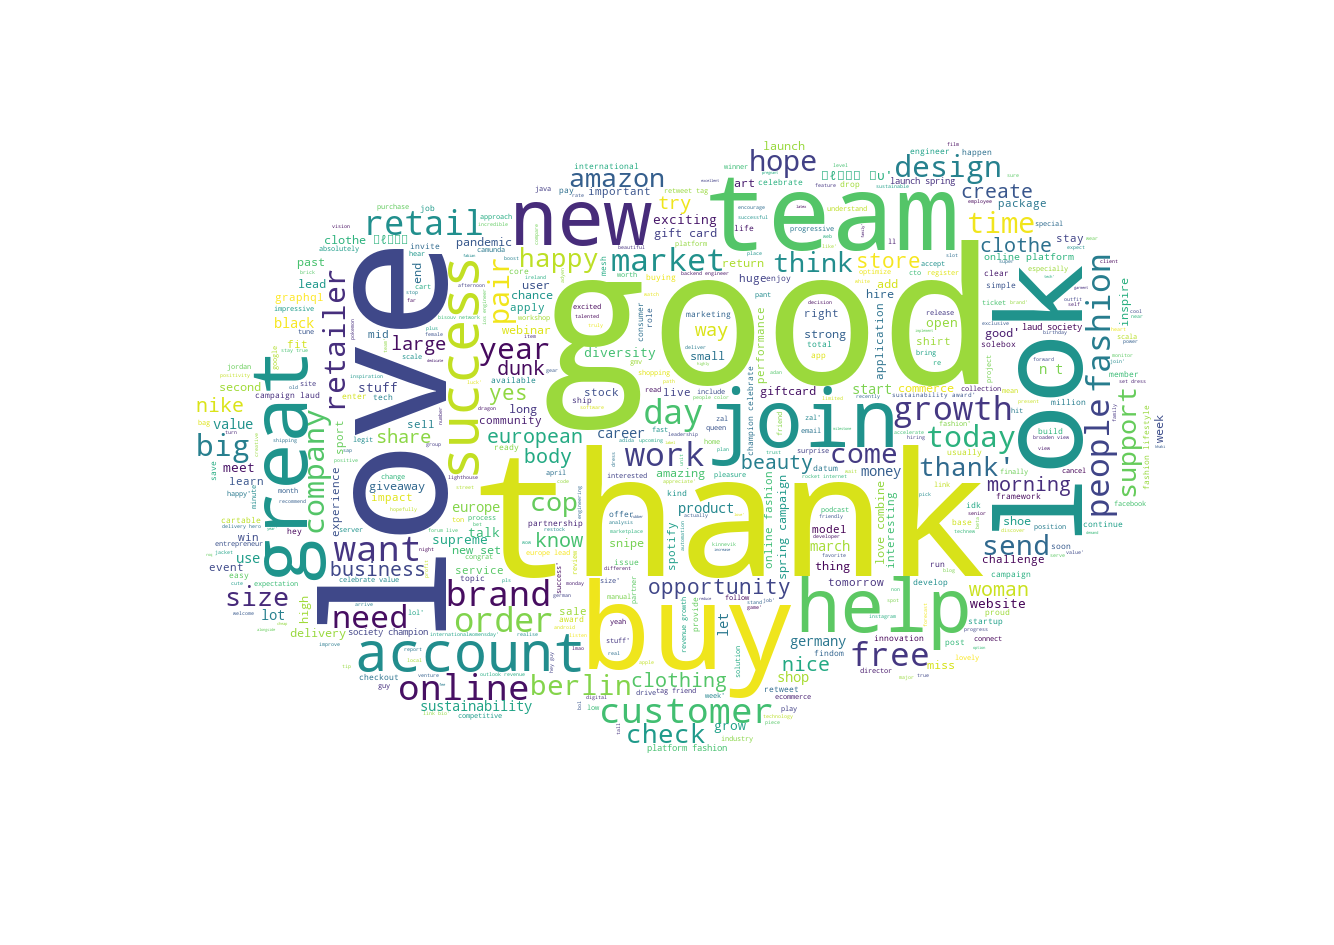

In [159]:
#Creating wordcloud for positive Zalando
pos_zalando = zalando[zalando['sentiment']==1]
create_wordcloud(pos_zalando.lemma.values)

Word Cloud Saved Successfully


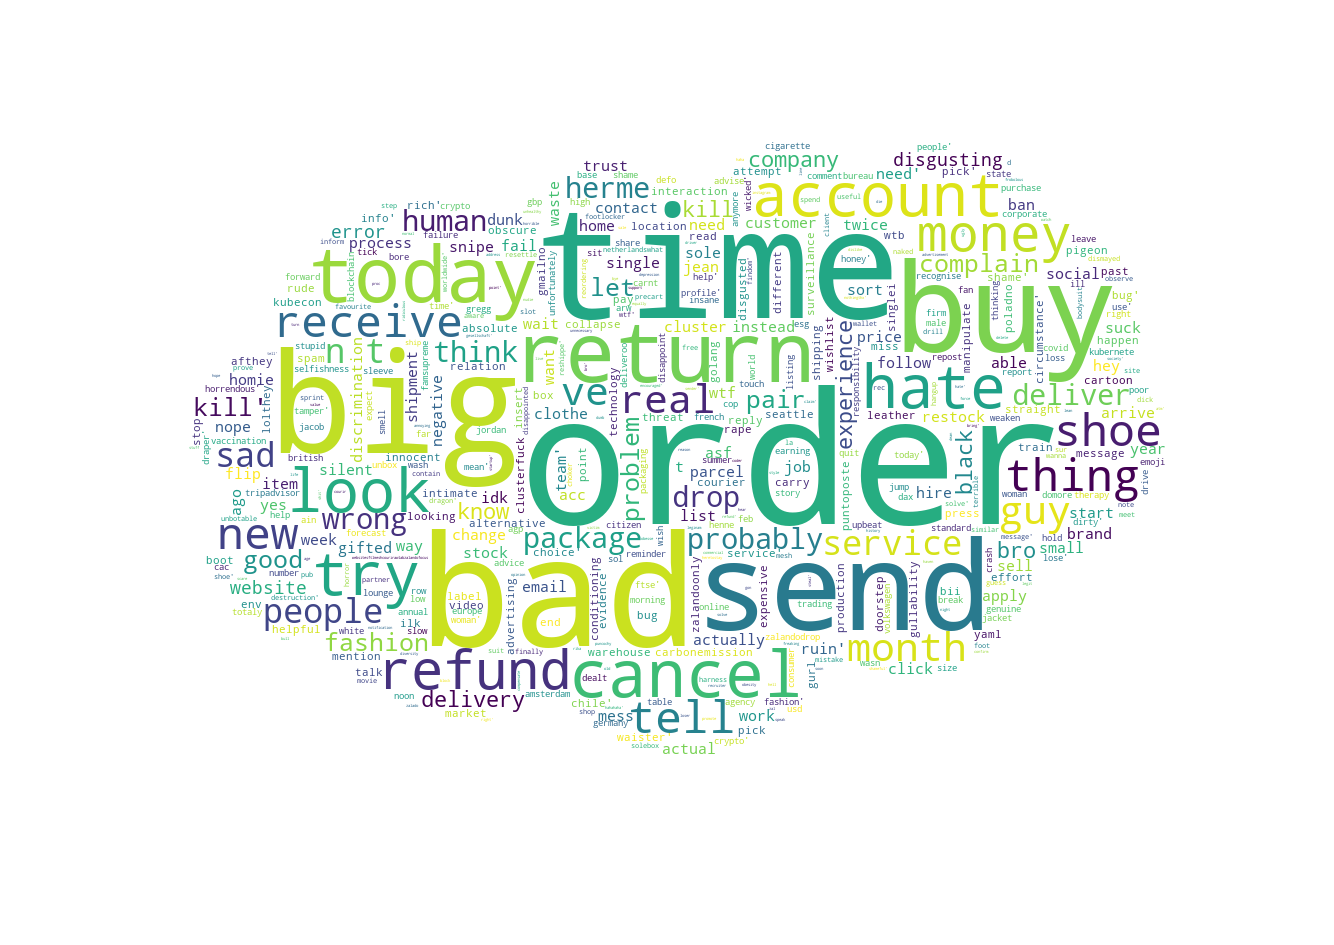

In [160]:
#Creating wordcloud for negative Zalando
neg_zalando = zalando[zalando['sentiment']==-1]
create_wordcloud(neg_zalando.lemma.values)

Word Cloud Saved Successfully


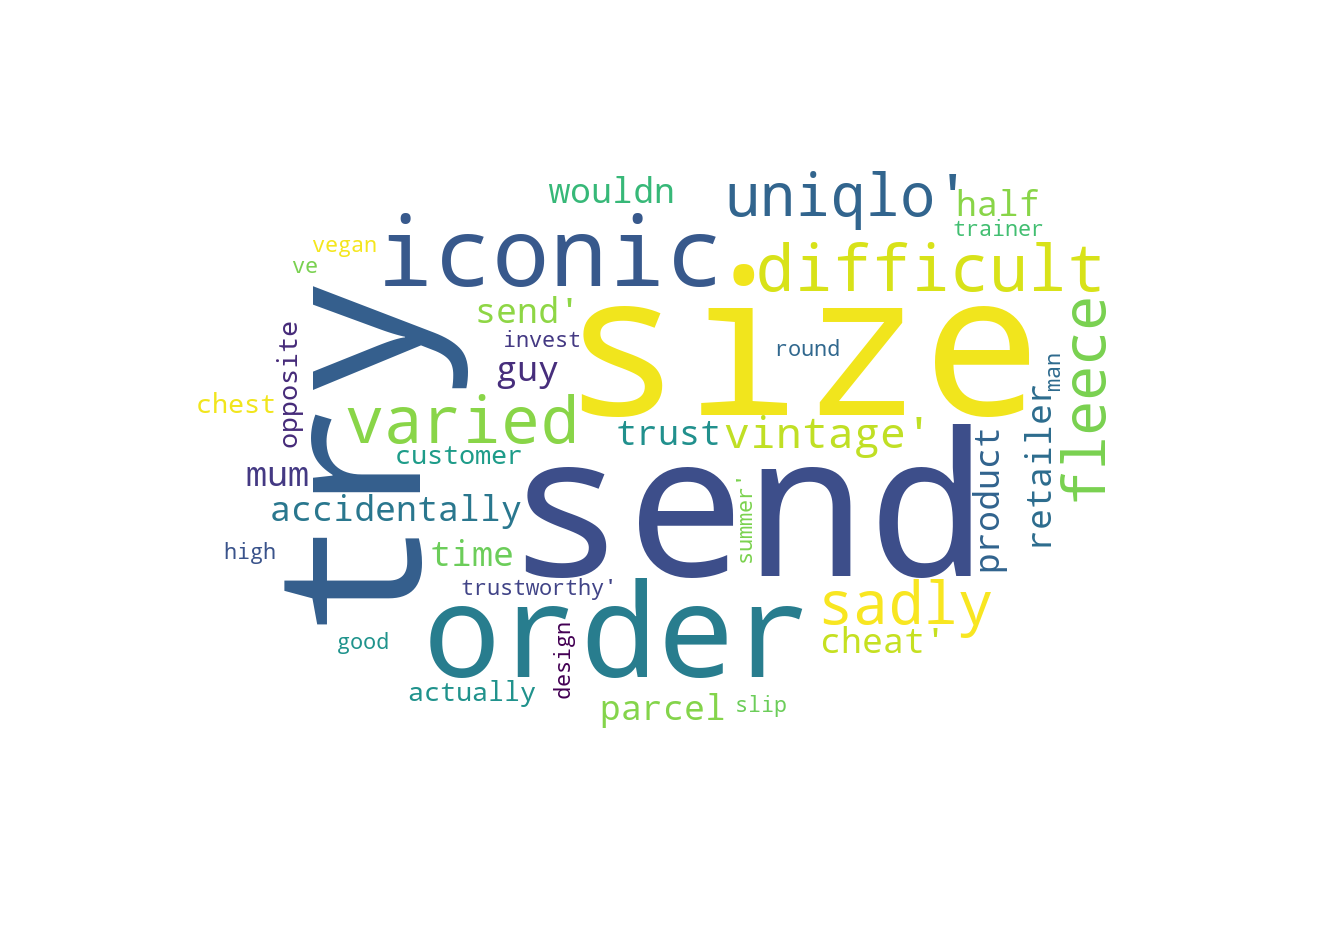

In [145]:
#Creating wordcloud for all asos
asos = teams[teams['keyword']=='asos']
create_wordcloud(asos.lemma.values)